# scaling of search

In [1]:
import random
import timeit
import time

In [2]:
def create_sequence_of_interest(length_of_seq):
    """
    create a sequence of given length containing integer values, either 1 or 2

    this is intended to represent the outcome of a sequence of coin flips
    """
    list_of_flips=[]
    for this_flip in range(length_of_seq):
        list_of_flips.append(random.randint(1, 2))
    return tuple(list_of_flips)

In [3]:
create_sequence_of_interest(5)

(2, 2, 2, 2, 1)

In [5]:
def find_match(sequence_of_interest):
    """
    given a sequence of integers (outcome of either 1 or 2), 
    flip a coin until that sequence is found
    """
    start_time = timeit.default_timer()
    number_of_coin_flips=0
    this_run=[]  # store the results of the random coin flips in a list
    while True:
        coin = random.randint(1, 2) # random coin flip results in 1 or 2
        number_of_coin_flips+=1
        this_run.append(coin)       # add coin flip result to list
        if (len(this_run)==len(sequence_of_interest)):
            found_match=False
            for flip_indx in range(len(sequence_of_interest)):
                if (sequence_of_interest[flip_indx] == this_run[flip_indx]):
                    found_match=True
                else: # patterns don't match
                    found_match=False
                    this_run=[]
                    break
            if (found_match==True):
                #print(this_run)
                break

    #print("number of coin flips:",number_of_coin_flips)
    elapsed = timeit.default_timer() - start_time
    #print(str(elapsed) + " seconds")
    return elapsed, number_of_coin_flips

In [8]:
seq_of_interest = create_sequence_of_interest(5)
print(seq_of_interest)
find_match(seq_of_interest)

(2, 2, 1, 2, 2)


(0.0004891549997410038, 75)

parameters for my investigation

In [9]:
number_of_experiments_per_loop=1000
start_length=3
end_length=10


<pre>
1000 sequences of length 3
1000 sequences of length 4
1000 sequences of length 5
...
1000 sequences of length 10
</pre>

To make that clearer, I'll break out what each experiment is
<pre>
1000 sequences of length 3:
* for a sequence (1,2,1), how many coin flips to find a match?
* for a sequence (1,1,1), how many coin flips to find a match?
* for a sequence (2,2,1), how many coin flips to find a match?
...
1000 sequences of length 4
* for a sequence (2,1,2,1), how many coin flips to find a match?
* for a sequence (1,2,1,1), how many coin flips to find a match?
* for a sequence (2,2,1,1), how many coin flips to find a match?
...
1000 sequences of length 5
* for a sequence (1,1,1,2,1), how many coin flips to find a match?
* for a sequence (1,1,1,2,1), how many coin flips to find a match?
* for a sequence (2,2,1,1,1), how many coin flips to find a match?
...
1000 sequences of length 10
* for a sequence (1,1,1,2,1,2,2,1,2,2), how many coin flips to find a match?
* for a sequence (1,1,1,2,1,2,1,2,1,1), how many coin flips to find a match?
* for a sequence (2,2,1,1,1,2,1,2,1,1), how many coin flips to find a match?
</pre>

In [10]:
list_of_result_dicts=[]
start_time=time.time()
for length_of_seq in range(3,10):
    for this_try in range(number_of_experiments_per_loop):
        sequence_of_interest = create_sequence_of_interest(length_of_seq)
#        print(sequence_of_interest)

        elapsed, number_of_coin_flips = find_match(sequence_of_interest)
#        print(elapsed,"seconds")
#        print(number_of_coin_flips)
        this_result={}
        this_result['elapsed time in seconds'] = elapsed
        this_result['number of flips'] = number_of_coin_flips
        this_result['sequence length'] = length_of_seq
        list_of_result_dicts.append(this_result)
        
print('elapsed:',time.time()-start_time,'seconds')

elapsed: 46.4642117023468 seconds


In [11]:
import pandas
pandas.__version__

'0.23.4'

In [12]:
results_df = pandas.DataFrame(list_of_result_dicts)
results_df.head(10)

,elapsed time in seconds,number of flips,sequence length
0,0.000555,75,3
1,0.000138,30,3
2,0.001051,72,3
3,0.000107,6,3
4,0.000087,15,3
5,0.000109,18,3
6,0.000090,15,3
7,0.000306,33,3
8,0.000023,3,3
9,0.000471,51,3


In [13]:
results_df.shape

(7000, 3)

In [14]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.0.2'

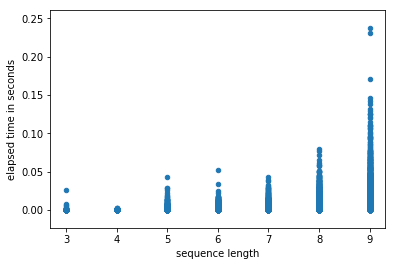

In [15]:
results_df.plot.scatter(x='sequence length',y='elapsed time in seconds')
plt.show()

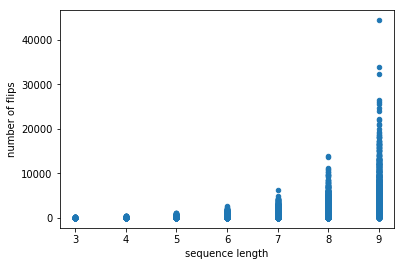

In [16]:
results_df.plot.scatter(x='sequence length',y='number of flips')
plt.show()

In [17]:
results_df.groupby('sequence length').describe()

elapsed time in seconds                                \
                                  count      mean       std       min   
sequence length                                                         
3                                1000.0  0.000189  0.000920  0.000009   
4                                1000.0  0.000265  0.000305  0.000012   
5                                1000.0  0.001523  0.003092  0.000016   
6                                1000.0  0.002820  0.003721  0.000021   
7                                1000.0  0.005044  0.005452  0.000025   
8                                1000.0  0.011076  0.011234  0.000035   
9                                1000.0  0.025205  0.026688  0.000028   

                                                        number of flips  \
                      25%       50%       75%       max           count   
sequence length                                                           
3                0.000039  0.000081  0.000160  0.025809          1000.0   
4                0.000072  0.000170  0.000339  0.002309          1000.0   
5                0.000244  0.000617  0.001482  0.042990          1000.0   
6                0.000662  0.001565  0.003588  0.051988          1000.0   
7                0.001338  0.003230  0.006971  0.042480          1000.0   
8                0.003165  0.007591  0.014936  0.079331          1000.0   
9                0.006997  0.016802  0.034782  0.237099          1000.0   

                                                                               
                     mean          std  min     25%     50%      75%      max  
sequence length                                                                
3                  25.044    22.852227  3.0     9.0    18.0    33.75    150.0  
4                  63.516    62.628748  4.0    20.0    44.0    88.00    456.0  
5                 160.190   162.034314  5.0    45.0   115.0   215.00   1180.0  
6                 380.526   392.306451  6.0   108.0   255.0   523.50   2616.0  
7                 929.124   864.421541  7.0   308.0   658.0  1296.75   6167.0  
8                2111.256  2001.083900  8.0   648.0  1576.0  2848.00  13880.0  
9                4802.508  4804.345849  9.0  1417.5  3262.5  6907.50  44397.0

We can add error bars to the plot for each sequence length

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

https://matplotlib.org/gallery/statistics/errorbar_features.html

In [18]:
import seaborn
print('seaborn',seaborn.__version__)

seaborn 0.9.0


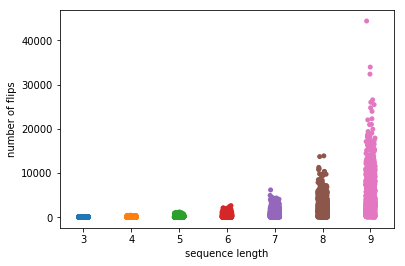

In [19]:
# https://seaborn.pydata.org/generated/seaborn.stripplot.html
_=seaborn.stripplot(x="sequence length", 
                        y="number of flips", 
                        data=results_df)

 The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">source</a>
 
The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. The second quartile (Q2) is the median of the data. The third quartile (Q3) is the middle value between the median and the highest value of the data set. <a href="https://en.wikipedia.org/wiki/Quartile">source</a>

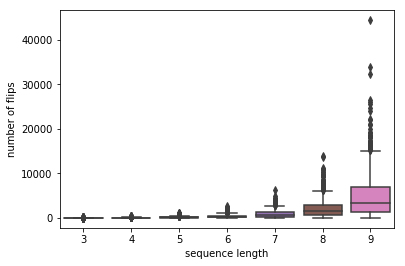

In [20]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
_=seaborn.boxplot(x="sequence length", 
                        y="number of flips", 
                        data=results_df)

the violin plot features a kernel density estimation of the underlying distribution

violins for relatively small samples might look misleadingly smooth.

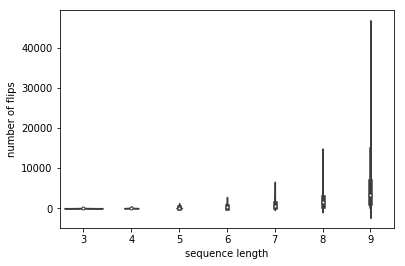

In [21]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
_ = seaborn.violinplot(x="sequence length", 
                        y="number of flips", 
                        data=results_df,
                        showmeans=True,
                        showextrema=True,
                        showmedians=True)